In [31]:
import pandas as pd
import numpy as np
data = pd.read_csv('../../earthquake_to_fit.csv')
pd.set_option('display.max_columns', None)


In [3]:
dataml = data[['mag', 'tsunami', 'type', 'depth', 'dist']]
#dataml.dropna(inplace=True)
d = dataml.copy()

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import joblib

In [5]:
numeric_features = ['mag', 'tsunami', 'depth', 'dist']
numeric_transformer = StandardScaler()

categorical_features = ['type']
categorical_transformer = OneHotEncoder(drop='first', sparse = False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [7]:


preprocessor.fit(d)
x = preprocessor.transform(d)
joblib.dump(preprocessor, 'pre.pkl', compress=1)

clus_max = 14
K = np.arange(2,clus_max+1)
Sum_of_squared_distances = []


In [ ]:

for clus in K:
    km = KMeans(n_clusters=clus, random_state=0)
    km.fit(x)
    etiquetas = km.labels_
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,preprocessor.transform(d).shape[0])
    Sum_of_squared_distances.append(distancia_media)
    print(clus)
    
# +3 min


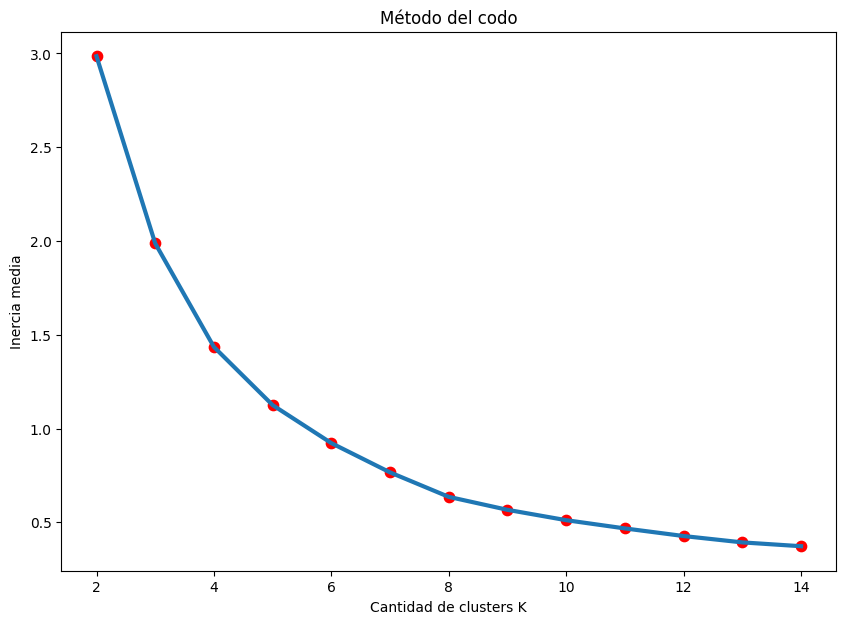

In [6]:
# plotting the results to apply the elbow technique

import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

In [8]:
# dump the best selected model due to elbow technique

cluster_elbow = 4

km = KMeans(n_clusters=cluster_elbow, random_state=0)
km.fit(x)
joblib.dump(km, 'km_'+str(cluster_elbow)+'.pkl', compress=1)

['km_4.pkl']

In [8]:

# silhouette (tarda años)
# valor_medio_sil = silhouette_score(preprocessor.transform(d), etiquetas)
# print(etiquetas)
# print(clus, valor_medio_sil)


## Obtener csv para carga inicial

In [9]:
tabla_clusters = pd.DataFrame()
tabla_clusters['id_terremotos'] = data['id']
tabla_clusters['cluster'] = km.labels_
tabla_clusters.to_csv('clustersinicial.csv', index=False)

In [10]:
tabla_clusters['cluster'].value_counts()

1    1502834
3     349839
0      13715
2       1524
Name: cluster, dtype: int64

In [19]:
data['cluster'] = km.labels_

In [20]:
data.head()

,id,mag,place,time,updated,felt,cdi,mmi,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,lon,lat,depth,dist,cluster
0,ci38692706,0.11,"14km SSW of Searles Valley, CA",2020-09-17 04:32:55.79,2020-09-22 15:38:31.987,NaN,NaN,NaN,reviewed,0,0,ci,38692706,",ci38692706,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",8,0.06373,0.15,149.0,ml,earthquake,-117.459667,35.650333,10.00,14,1
1,us6000bzp0,4.10,"61 km SW of Palana, Russia",2020-09-17 04:29:22.603,2020-11-28 21:31:47.04,NaN,NaN,NaN,reviewed,0,259,us,6000bzp0,",us6000bzp0,",",us,",",origin,phase-data,",1,0.15400,0.53,116.0,mb,earthquake,159.176300,58.701100,10.00,61,3
2,us6000bzpa,4.40,"52 km WSW of F?r?z?b?d, Iran",2020-09-17 04:29:05.818,2020-11-28 21:31:47.04,NaN,NaN,NaN,reviewed,0,298,us,6000bzpa,",us6000bzpa,",",us,",",origin,phase-data,",1,0.15400,0.38,74.0,mb,earthquake,52.077000,28.649900,10.00,52,3
3,mb80463974,2.07,"27 km NW of Stanley, Idaho",2020-09-17 04:26:28.89,2020-09-17 14:20:04.83,NaN,NaN,NaN,reviewed,0,66,mb,80463974,",mb80463974,",",mb,",",origin,phase-data,",9,0.15400,0.22,77.0,ml,earthquake,-115.219833,44.356833,14.66,27,1
4,nc73459001,0.34,"12km ENE of Mammoth Lakes, CA",2020-09-17 04:22:27.47,2020-09-17 05:49:03.75,NaN,NaN,NaN,reviewed,0,2,nc,73459001,",nc73459001,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",12,0.02699,0.06,146.0,md,earthquake,-118.851833,37.661833,10.00,12,1


In [12]:
eq_wea = pd.read_csv('../../earthquake_weather.csv')

In [14]:
eq_wea.rename(columns = {'Id_main':'id'}, inplace=True)

In [21]:
aux = pd.DataFrame()
aux['id'] = eq_wea['id']

In [23]:
aux['signif']= 1

In [24]:
aux

,id,signif
0,usp000jmmc,1
1,usp000jyqe,1
2,usb000geu9,1
3,us20005gsg,1
4,usp000hbmk,1
...,...,...
680,us1000hw7f,1
681,usp000hj4g,1
682,us7000gkjc,1
683,us7000h5hl,1


In [28]:
data = data.merge(aux, how='left', on='id')

In [29]:
data['signif'].sum()

685.0

In [30]:
data.to_csv('../../DATA_analysis_ML.csv')